# Programming Assignment #3

## 1. Decision tree using scikit-learn
The mpg.csv dataset contains information on miles per gallon (mpg) and engine size for cars sold from 1970 through 1982.

- Create a dataframe X containing the features cylinders, weight, and mpg.
- Create a dataframe y containing the feature origin.
- Initialize and fit a classification tree with max_leaf_nodes=6 to the training data.
- Use the classification tree to make predictions for the test data.
- Create a confusion matrix.

Ex: If the input feature displacement is used instead of cylinders, the output should be:

![Screenshot 2024-07-12 at 10.44.45 AM.png](attachment:0ceabe3c-5968-4e78-853d-f998808be339.png)

![Screenshot 2024-07-12 at 10.46.40 AM.png](attachment:43c8b9cd-7eb2-4f45-ac44-38b2597efe17.png)

|--- feature_0 <= 5.50
|   |--- feature_2 <= 30.95
|   |   |--- feature_1 <= 1947.50
|   |   |   |--- class: europe
|   |   |--- feature_1 >  1947.50
|   |   |   |--- feature_1 <= 2901.50
|   |   |   |   |--- feature_1 <= 2379.50
|   |   |   |   |   |--- class: japan
|   |   |   |   |--- feature_1 >  2379.50
|   |   |   |   |   |--- class: usa
|   |   |   |--- feature_1 >  2901.50
|   |   |   |   |--- class: europe
|   |--- feature_2 >  30.95
|   |   |--- class: japan
|--- feature_0 >  5.50
|   |--- class: usa



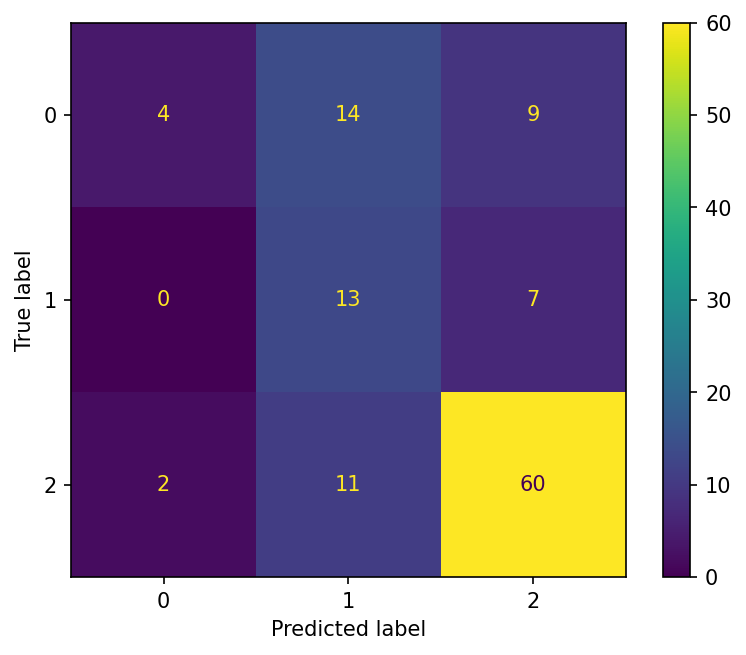

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mpg = pd.read_csv('mpg.csv')
plt.rcParams['figure.dpi'] = 150

# Create a dataframe X containing cylinders, weight, and mpg
X = mpg[['cylinders', 'weight', 'mpg']]

# Create a dataframe y containing origin
y = mpg['origin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Initialize the tree with `max_leaf_nodes=6`
DTC = DecisionTreeClassifier(max_leaf_nodes=6)

# Fit the tree to the training data
DTC.fit(X_train, y_train)

# Print the text summary of the tree
DTC_tree = export_text(DTC)
print(DTC_tree)

# Make predictions for the test data
y_pred = DTC.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
ConfusionMatrixDisplay(cm).plot()
plt.savefig('confMatrix.png')